## BUSINESS UNDERSTANDING

The prime aim of this project is to assess whether or not a new customer is likely to pay back the loan. 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), binary classification model will be developed to predict wether or not a borrower will pay back their loan? 

For the scope of this project, a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club will be used.

## Getting Familiar with the Data

Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>


## Loading the Data and Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report,confusion_matrix
from yellowbrick.classifier import ClassificationReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('lending_club_loan.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\nGreggshire, VA 11650"


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.00,14113.89,8357.44,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.00,13.64,4.47,5.32,10.49,13.33,16.49,30.99
installment,396030.00,431.85,250.73,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.00,74203.18,61637.62,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.00,17.38,18.02,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.00,11.31,5.14,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.00,0.18,0.53,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.00,15844.54,20591.84,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.00,53.79,24.45,0.00,35.80,54.80,72.90,892.30
total_acc,396030.00,25.41,11.89,2.00,17.00,24.00,32.00,151.00


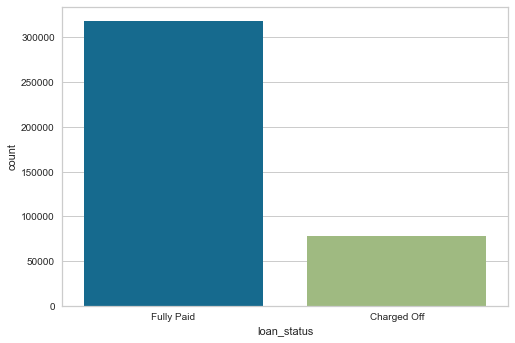

In [5]:
sns.countplot(x='loan_status',data=df);

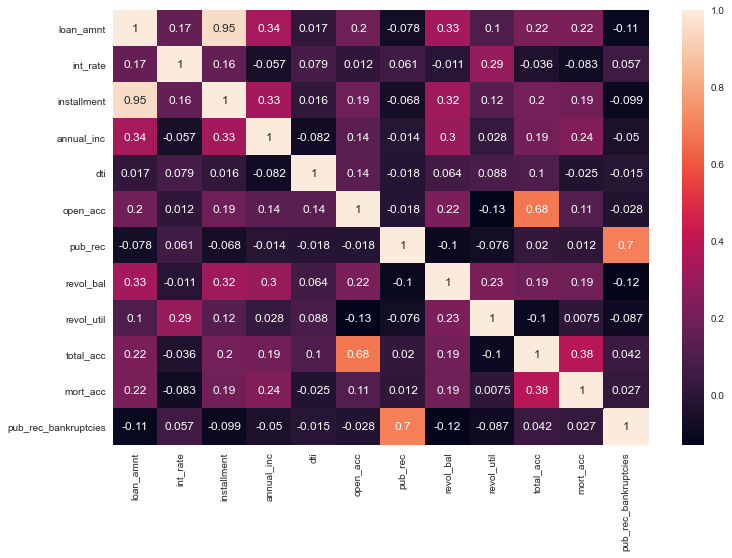

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True);

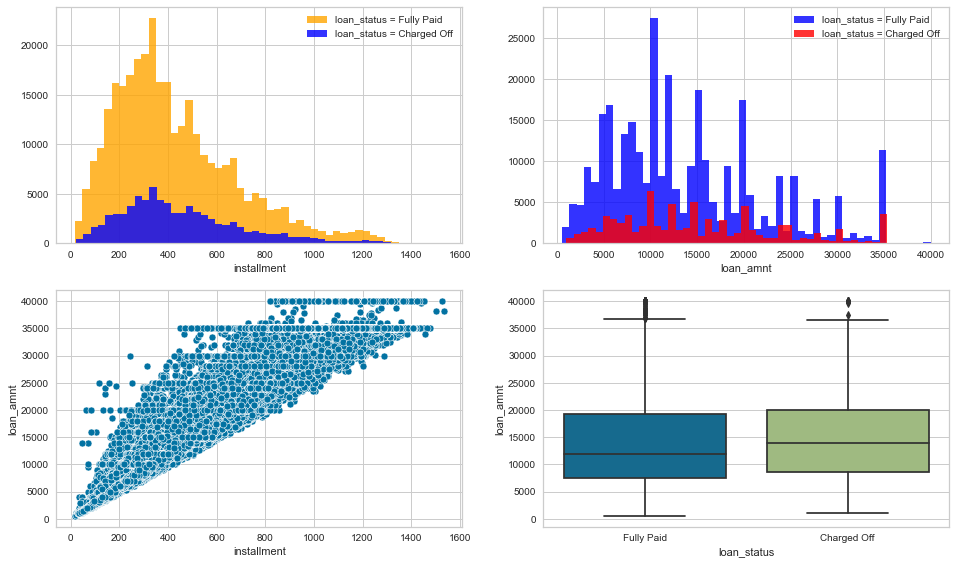

In [7]:
plt.figure(figsize=(16, 20))

plt.subplot(4, 2, 1)
df[df["loan_status"] == "Fully Paid"]["installment"].hist(bins=50, color='orange', label='loan_status = Fully Paid', alpha=0.8)
df[df["loan_status"] == "Charged Off"]["installment"].hist(bins=50, color='blue', label='loan_status = Charged Off', alpha=0.8)
plt.legend()
plt.xlabel("installment")

plt.subplot(4, 2, 2)
df[df["loan_status"] == "Fully Paid"]["loan_amnt"].hist(bins=50, color='blue', label='loan_status = Fully Paid', alpha=0.8)
df[df["loan_status"] == "Charged Off"]["loan_amnt"].hist(bins=50, color='red', label='loan_status = Charged Off', alpha=0.8)
plt.legend()
plt.xlabel("loan_amnt")

plt.subplot(4, 2, 3)
sns.scatterplot(x='installment', y='loan_amnt', data=df)

plt.subplot(4, 2, 4)
sns.boxplot(x='loan_status', y='loan_amnt', data=df);

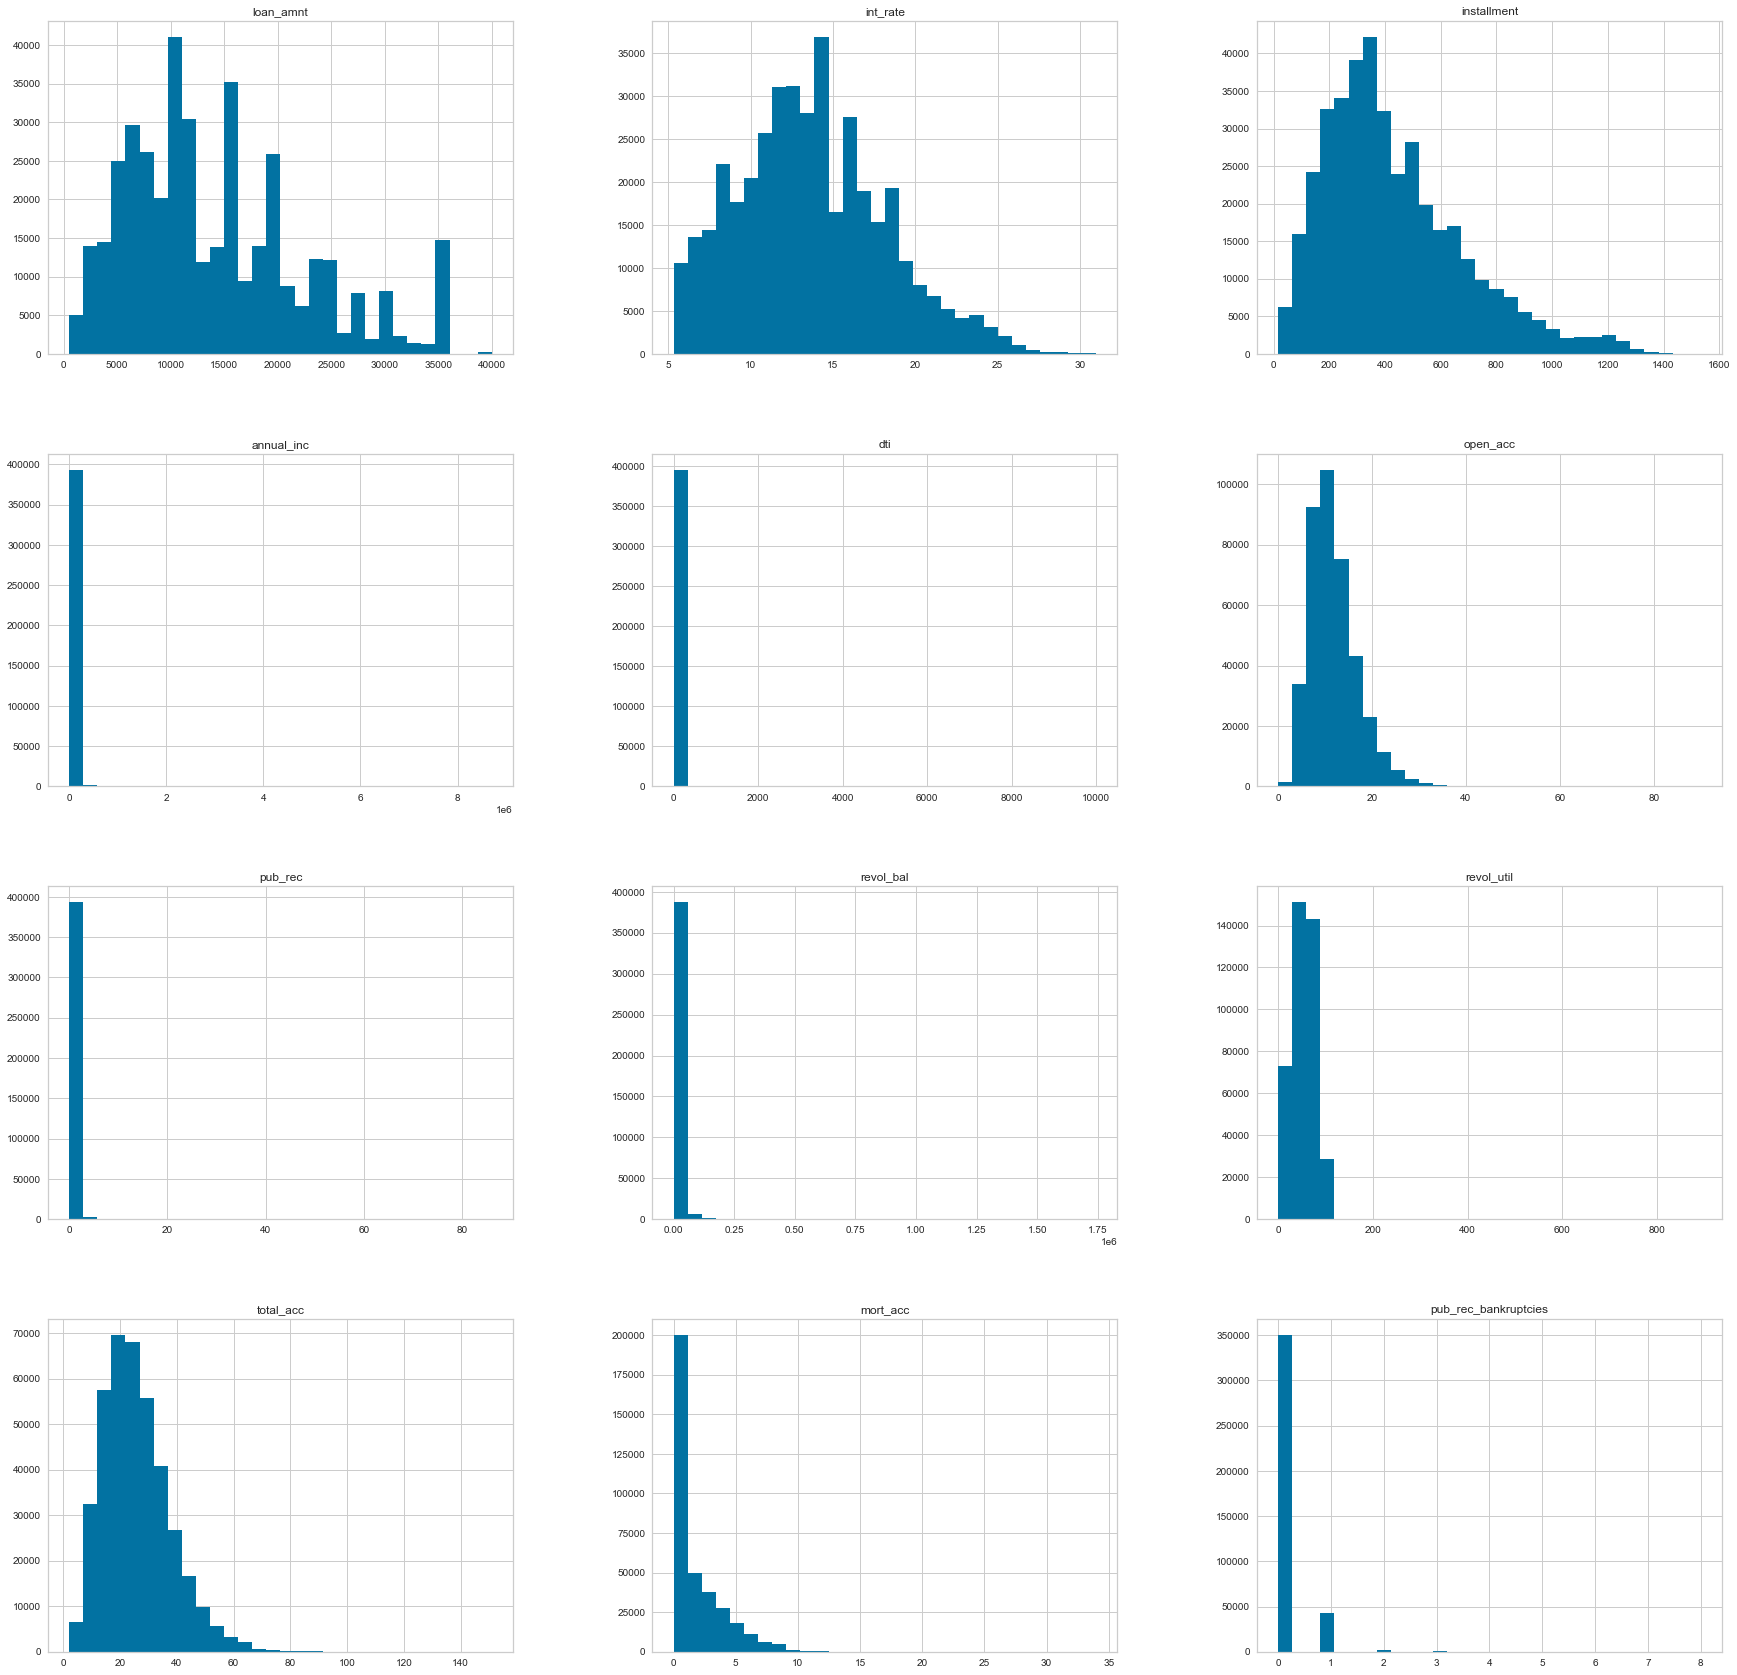

In [8]:
num_df = df.select_dtypes(exclude=['object'])
num_df.hist(bins=30, figsize=(30,30))
plt.show();

In [9]:
term_grade = ['term', 'grade']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[term_grade[0]], df[term_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
term,,,,,,,
36 months,62737,104285,79388,41151,11587,2483,374
60 months,1450,11733,26599,22373,19901,9289,2680


In [10]:
app_type_loan_stat = ['application_type','loan_status']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[app_type_loan_stat[0]], df[app_type_loan_stat[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid
application_type,,
DIRECT_PAY,102,184
INDIVIDUAL,77517,317802
JOINT,54,371


In [11]:
loan_stat_home = ['loan_status','home_ownership']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[loan_stat_home[0]], df[loan_stat_home[1]]).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0,33632,7,16,7806,36212
Fully Paid,3,164716,24,96,29940,123578


In [12]:
loan_stat_term = ['loan_status','term']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[loan_stat_term[0]], df[loan_stat_term[1]]).style.background_gradient(cmap = cm)

term,36 months,60 months
loan_status,,
Charged Off,47640,30033
Fully Paid,254365,63992


In [13]:
loan_stat_purpose = ['purpose','loan_status']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[loan_stat_purpose[0]], df[loan_stat_purpose[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid
purpose,,
car,633,4064
credit_card,13874,69145
debt_consolidation,48640,185867
educational,42,215
home_improvement,4087,19943
house,434,1767
major_purchase,1448,7342
medical,911,3285
moving,670,2184


In [14]:
loan_stat_verification = ['verification_status','loan_status']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[loan_stat_verification[0]], df[loan_stat_verification[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,18307,106775
Source Verified,28214,103171
Verified,31152,108411


In [15]:
loan_stat_bankrupt = ['loan_status','pub_rec_bankruptcies']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[loan_stat_bankrupt[0]], df[loan_stat_bankrupt[1]]).style.background_gradient(cmap = cm)

pub_rec_bankruptcies,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
loan_status,,,,,,,,,
Charged Off,68321,8727,429,74,26,5,2,1,1
Fully Paid,282059,34063,1418,277,56,27,5,3,1


<Figure size 1152x864 with 0 Axes>

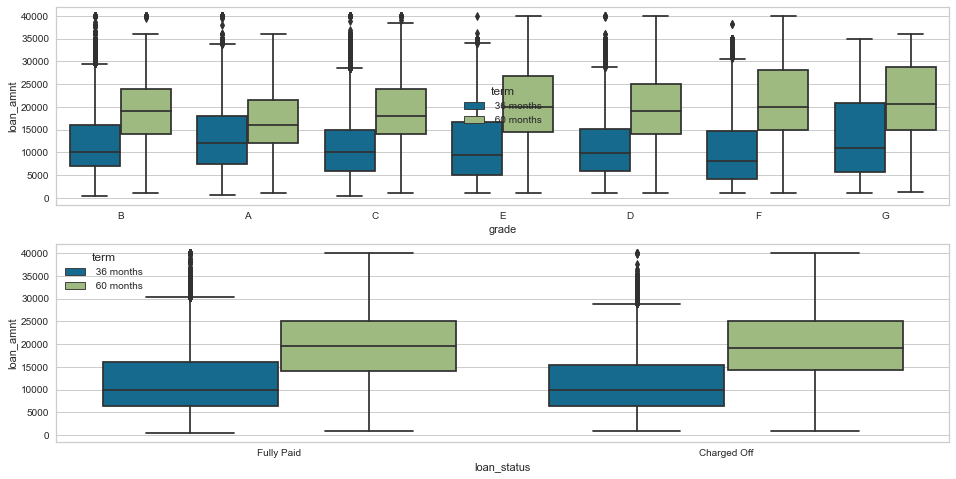

In [16]:
plt.figure(figsize=(16,12))
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.boxplot(x='grade', y='loan_amnt', data=df, hue='term',ax=ax[0])
sns.boxplot(x='loan_status', y='loan_amnt', data=df, hue='term', ax=ax[1])
plt.show();

<Figure size 1152x864 with 0 Axes>

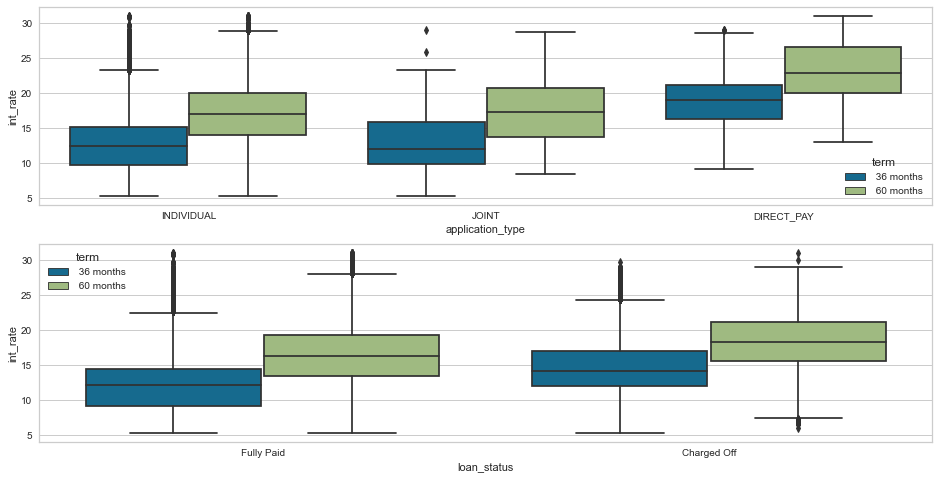

In [17]:
plt.figure(figsize=(16,12))
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.boxplot(x='application_type', y='int_rate', data=df, hue='term',ax=ax[0])
sns.boxplot(x='loan_status', y='int_rate', data=df, hue='term', ax=ax[1])
plt.show();

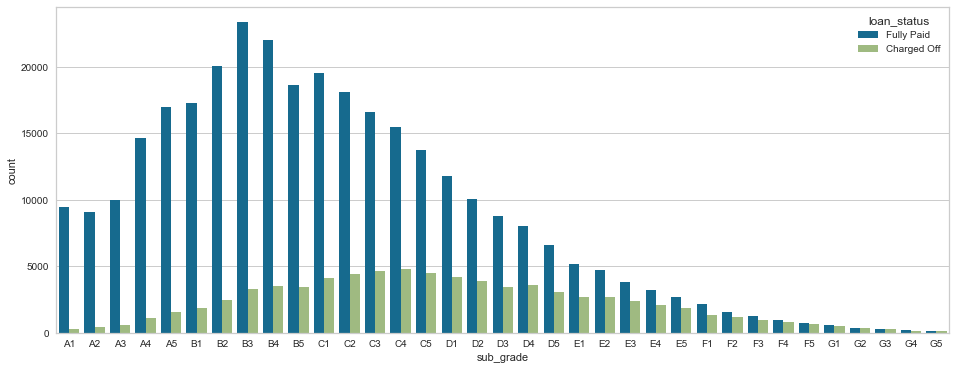

In [18]:
plt.figure(figsize=(16,6))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,hue='loan_status');

## Data Preprocessing

**loan_status**

In [19]:
df.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [20]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df.loan_status.value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

### Handling with Missing Values

In [21]:
def null_values(df):
    percent = df.isnull().sum()*100/df.shape[0]
    total = df.isnull().sum()
    return pd.DataFrame(list(zip(total,percent)), columns = ["Total","Percent"],index=df.columns)
null_values(df)

,Total,Percent
loan_amnt,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00
sub_grade,0,0.00
emp_title,22927,5.79
emp_length,18301,4.62
home_ownership,0,0.00
annual_inc,0,0.00


**Emp_title(The job title supplied by the Borrower)**

In [22]:
df.emp_title.value_counts()

Teacher                                   4389
Manager                                   4250
Registered Nurse                          1856
RN                                        1846
Supervisor                                1830
                                          ... 
costco wholezale                             1
front end service associate                  1
Nicklas Associates / Merck & Co., Inc.       1
Capital-preowened                            1
Film Maker                                   1
Name: emp_title, Length: 173105, dtype: int64

In [23]:
# Since there are too many unique job titles to try to convert this to a dummy variable feature. 
# No need to handle the missing values. It is better to drop emp_title column
df = df.drop('emp_title',axis=1)

**Emp_lenght (Employment length in years)**

In [24]:
df.emp_length.value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [25]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

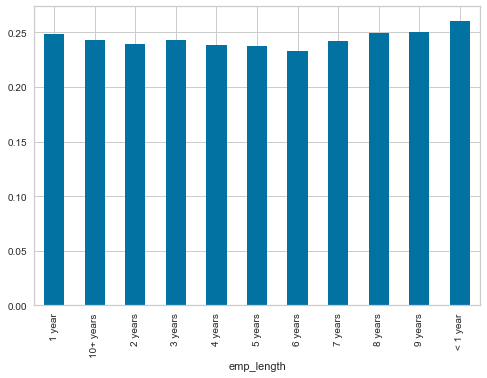

In [26]:
emp_co = df[df['loan_status']==0].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']==1].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len.plot(kind='bar');

In [27]:
# Since Charge off rates are almost similar across all employment lenghts, 
# I do not think it accounts for model variances, therefore, decide to drop
df.drop('emp_length', axis=1, inplace=True)

**Purpose and Title (A category provided by the borrower for the loan request)**

In [28]:
df[["title", "purpose"]].head()

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card


In [29]:
# Since the title column is simply a string subcategory/description of the purpose column, 
# Go ahead and drop the title column and keep the purpose column
df = df.drop('title',axis=1)

**mort_acc (Number of mortgage accounts)**

In [30]:
df['mort_acc'].value_counts()

0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
23.00         2
32.00         2
26.00         2
31.00         2
30.00         1
28.00         1
34.00         1
Name: mort_acc, dtype: int64

In [31]:
def mort_acc(x):
    if x == 0.0:
        return 0
    elif x >= 1.0:
        return 1
    else:
        return x
df['mort_acc'] = df.mort_acc.apply(mort_acc)

In [32]:
df.corr()['mort_acc'].sort_values(ascending = False)

mort_acc                1.00
total_acc               0.30
loan_amnt               0.21
annual_inc              0.20
installment             0.18
revol_bal               0.17
open_acc                0.12
loan_status             0.07
pub_rec_bankruptcies    0.05
pub_rec                 0.03
revol_util              0.00
dti                    -0.02
int_rate               -0.09
Name: mort_acc, dtype: float64

In [33]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

**pub_rec**

In [34]:
df.pub_rec.value_counts()

0.00     338272
1.00      49739
2.00       5476
3.00       1521
4.00        527
5.00        237
6.00        122
7.00         56
8.00         34
9.00         12
10.00        11
11.00         8
13.00         4
12.00         4
19.00         2
86.00         1
40.00         1
17.00         1
15.00         1
24.00         1
Name: pub_rec, dtype: int64

In [35]:
def pub_rec(x):
    if x == 0.0:
        return 0
    else:
        return 1
df['pub_rec'] = df.pub_rec.apply(pub_rec)

**pub_rec_bankrupties**

In [36]:
df.pub_rec_bankruptcies.value_counts()

0.00    350380
1.00     42790
2.00      1847
3.00       351
4.00        82
5.00        32
6.00         7
7.00         4
8.00         2
Name: pub_rec_bankruptcies, dtype: int64

In [37]:
def pub_rec_bankruptcies(x):
    if x == 0.0:
        return 0
    elif x >= 1.0:
        return 1
    else:
        return x
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [38]:
null_values(df)

,Total,Percent
loan_amnt,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00
sub_grade,0,0.00
home_ownership,0,0.00
annual_inc,0,0.00
verification_status,0,0.00
issue_d,0,0.00


In [39]:
df = df.dropna()

In [40]:
null_values(df)

,Total,Percent
loan_amnt,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00
sub_grade,0,0.00
home_ownership,0,0.00
annual_inc,0,0.00
verification_status,0,0.00
issue_d,0,0.00


In [41]:
df.shape

(395219, 24)

## Handling with Categorical Variables

**term**

In [42]:
df.term.value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [43]:
term_dict = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_dict)

**grade and subgrade**

In [44]:
df[["grade", "sub_grade"]].head(10)

,grade,sub_grade
0,B,B4
1,B,B5
2,B,B3
3,A,A2
4,C,C5
5,C,C3
6,A,A1
7,B,B2
8,B,B3
9,C,C5


In [45]:
df = df.drop('grade',axis=1)

**home_ownership**

In [46]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [47]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

**verification_status**

In [48]:
df.verification_status.value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

**issue_d**

In [49]:
df.issue_d.value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Nov-2007        1
Oct-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

In [50]:
df = df.drop('issue_d',axis=1)

**purpose**

In [51]:
df.purpose.value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

**earliest_cr_line**

In [52]:
df.earliest_cr_line.value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jun-1955       1
Jul-1962       1
Aug-1960       1
Sep-1961       1
Jul-1958       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [53]:
df['earliest_cr_line'] = df.earliest_cr_line.str.split('-', expand=True)[1]

In [54]:
df.earliest_cr_line

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [55]:
df.earliest_cr_line.nunique()

65

**initial_list_status**

In [56]:
df.initial_list_status.value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

**application_type**

In [57]:
df.application_type.value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

**adress**

In [58]:
df.address.head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [59]:
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [60]:
df = df.drop('address',axis=1)

In [61]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'home_ownership', 'zip_code']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [62]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36,11.44,329.48,117000.00,1,26.24,1990,16.00,0,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36,11.99,265.68,65000.00,1,22.05,2004,17.00,0,20131.00,53.30,27.00,1.00,0.00,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,1,12.79,2007,13.00,0,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36,6.49,220.65,54000.00,1,2.60,2006,6.00,0,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60,17.27,609.33,55000.00,0,33.95,1999,13.00,0,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


## Removing Duplicates if any

In [63]:
print(f"Data shape: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Data shape: {df.shape}")

Data shape: (395219, 79)
Data shape: (395219, 79)


# Model Development

### Train Test Split

In [64]:
X = df.drop('loan_status',axis = 1).values
y = df['loan_status'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(296414, 78)
(98805, 78)
(296414,)
(98805,)


### Scaling

In [65]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating a Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tensorflow.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

### Training the Model

In [68]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=256,epochs=60, callbacks=[early_stop])

Epoch 1/60
1158/1158 [==============================] - 4s 3ms/step - loss: 0.3540 - accuracy: 0.8524 - val_loss: 0.2618 - val_accuracy: 0.8888
Epoch 2/60
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2657 - accuracy: 0.8877 - val_loss: 0.2609 - val_accuracy: 0.8888
Epoch 3/60
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2644 - accuracy: 0.8872 - val_loss: 0.2598 - val_accuracy: 0.8888
Epoch 4/60
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2622 - accuracy: 0.8882 - val_loss: 0.2594 - val_accuracy: 0.8888
Epoch 5/60
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2618 - accuracy: 0.8879 - val_loss: 0.2594 - val_accuracy: 0.8888
Epoch 6/60
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2614 - accuracy: 0.8875 - val_loss: 0.2592 - val_accuracy: 0.8889
Epoch 7/60
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2603 - accuracy: 0.8884 - val_loss: 0.2590 - val_accuracy:

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 78)                6162      
_________________________________________________________________
dropout (Dropout)            (None, 78)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               10112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [70]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.30,0.88,0.26,0.89
1,0.27,0.89,0.26,0.89
2,0.26,0.89,0.26,0.89
3,0.26,0.89,0.26,0.89
4,0.26,0.89,0.26,0.89
5,0.26,0.89,0.26,0.89
6,0.26,0.89,0.26,0.89
7,0.26,0.89,0.26,0.89
8,0.26,0.89,0.26,0.89
9,0.26,0.89,0.26,0.89


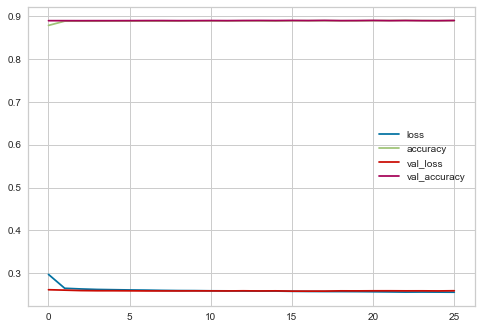

In [71]:
losses.plot();

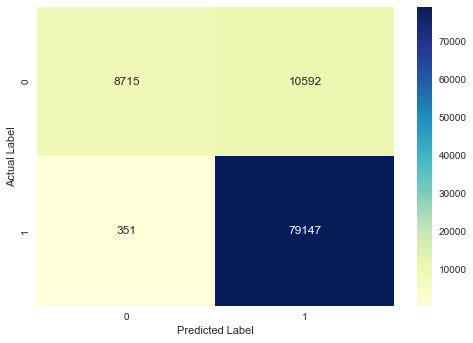

In [72]:
y_pred = model.predict_classes(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     19307
           1       0.88      1.00      0.94     79498

    accuracy                           0.89     98805
   macro avg       0.92      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805



## Model Prediction based on New Data

In [74]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_status',axis=1).iloc[random_ind]
new_customer

loan_amnt        25000.00
term                   60
int_rate            18.24
installment        638.11
annual_inc       61665.00
                   ...   
zip_code_30723          1
zip_code_48052          0
zip_code_70466          0
zip_code_86630          0
zip_code_93700          0
Name: 305323, Length: 78, dtype: object

In [75]:
x = np.asarray(new_customer.values).astype('float32')
x

array([2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
       3.0110e+01, 1.9960e+03, 1.6000e+01, 0.0000e+00, 2.7778e+04,
       6.5500e+01, 4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e

In [76]:
model.predict_classes(x.reshape(1,78))

array([[1]])

## Model Saving

In [77]:
from tensorflow.keras.models import load_model
model.save('final_loan_model.h5')  

## XGBoost Classifier

In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train , y_train)
y_pred = xgb.predict(X_test)

[11:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


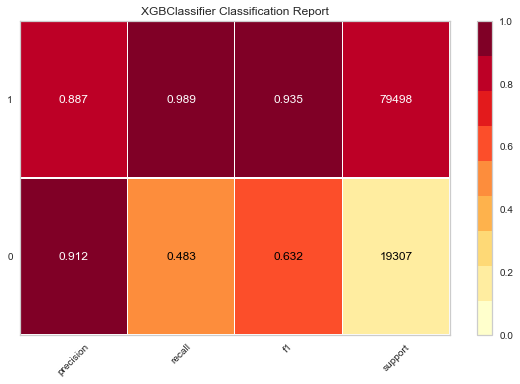

In [79]:
visualizer = ClassificationReport(xgb, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)        
visualizer.show();

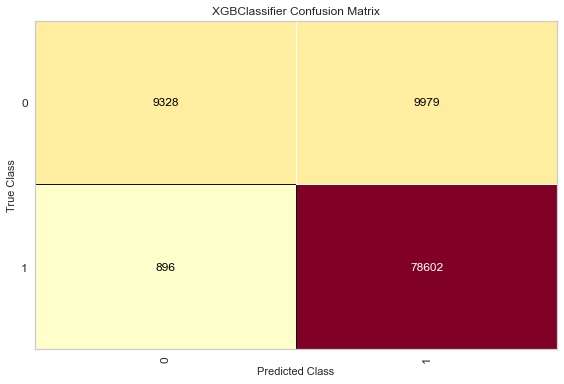

In [80]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

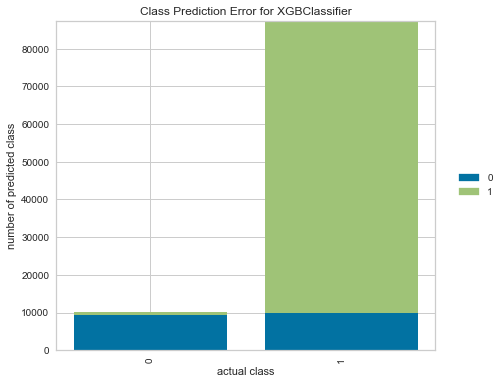

In [81]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(xgb)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Random Forests Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

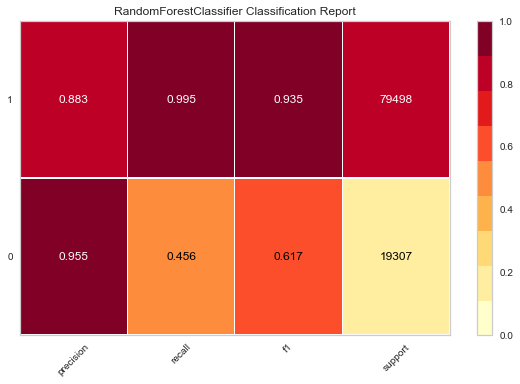

In [83]:
visualizer = ClassificationReport(rf, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)        
visualizer.show();

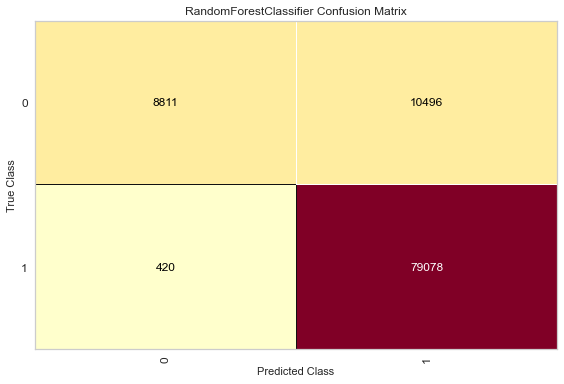

In [84]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

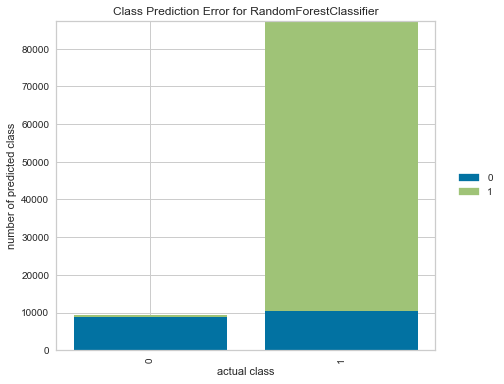

In [85]:
visualizer = ClassPredictionError(rf) 
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show();